In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Titanic Dataset

- Chck missing values
    - using sns.heatmap(df.isnull(),yticklabels = False)

In [2]:
train = pd.read_csv("C:/Users/Priyaranjan/Desktop/Kaggle datasets/Titanic dataset/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing values

<Axes: >

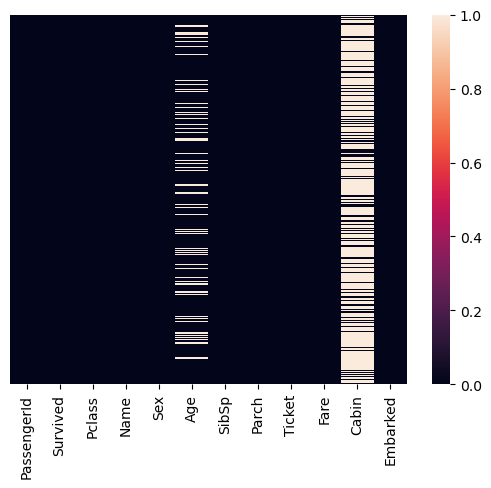

In [3]:
sns.heatmap(train.isnull(),yticklabels=False)

- Age & Cabin columns have null values in the data.
- Abput 20% of Age column has missing or null values.
- Cabin has a significant amount of null values.

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

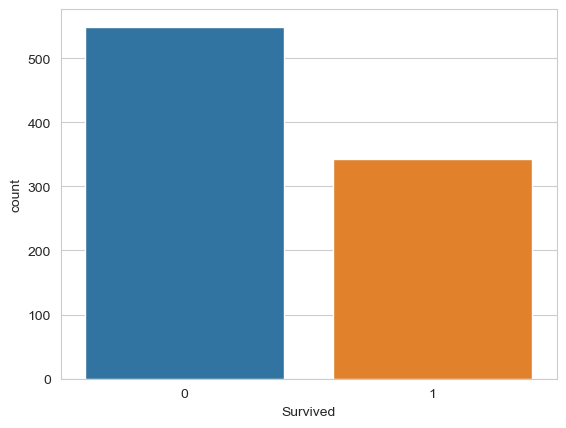

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

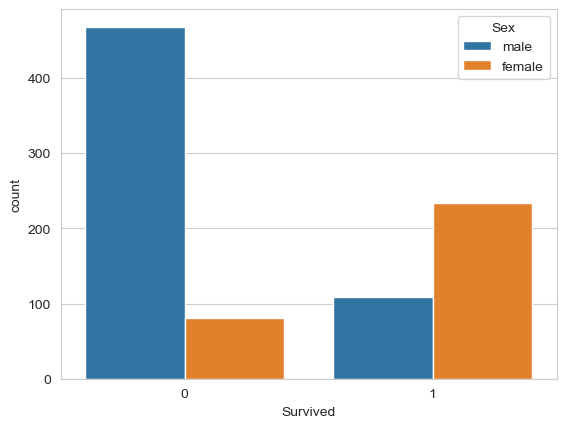

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

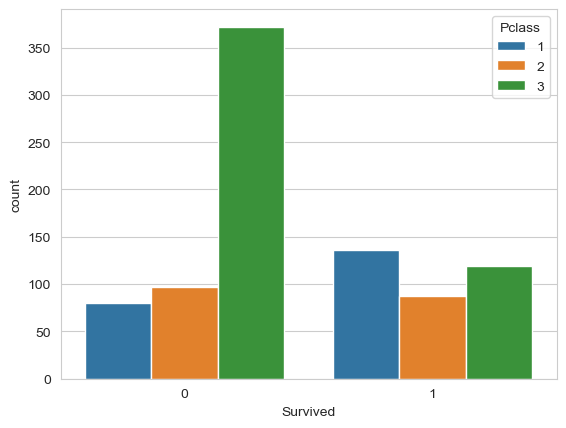

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

- Passenger class 1 - many survived.
- Passenger class 3 -  more people died.

<Axes: xlabel='Age', ylabel='Density'>

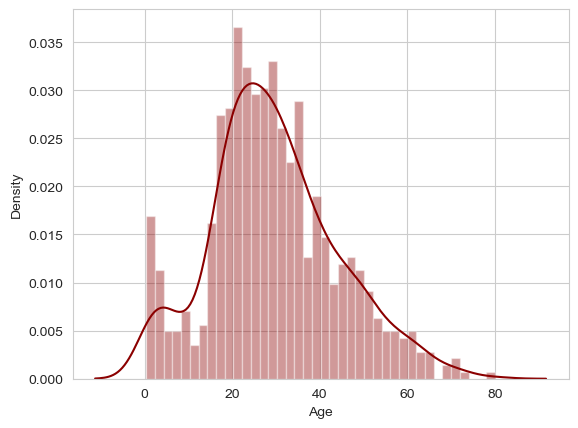

In [8]:
sns.distplot(train['Age'].dropna(),kde=True,bins=40,color='darkred')

<Axes: >

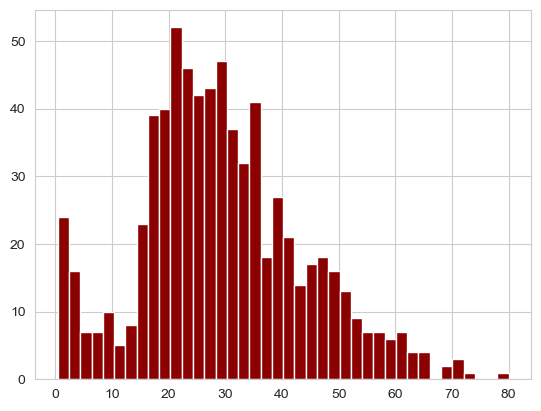

In [9]:
train['Age'].hist(bins=40,color='darkred')

<Axes: xlabel='SibSp', ylabel='count'>

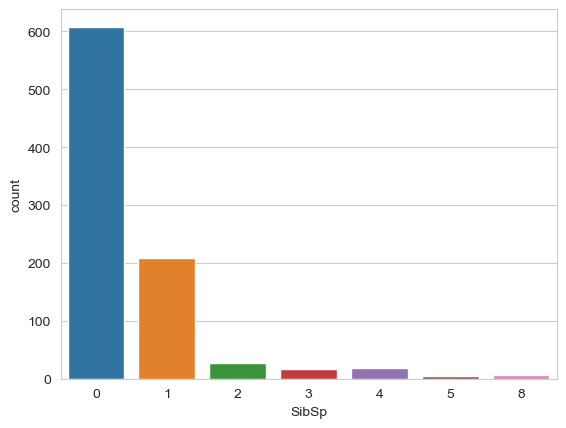

In [10]:
sns.countplot(x='SibSp',data=train)

- Maximum people weren't travelling with sibling or spouse.

<Axes: >

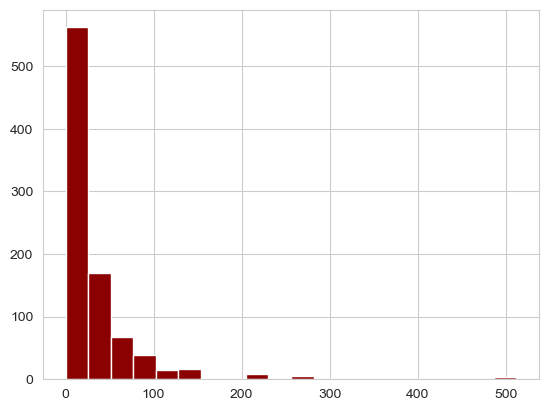

In [11]:
train['Fare'].hist(color='darkred',bins=20)

In [12]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#numeric_cols = train.select_dtypes(include=['number'])
selected_columns = train[['Fare', 'Pclass', 'Age','SibSp']]

selected_columns.corr()

,Fare,Pclass,Age,SibSp
Fare,1.000000,-0.549500,0.096067,0.159651
Pclass,-0.549500,1.000000,-0.369226,0.083081
Age,0.096067,-0.369226,1.000000,-0.308247
SibSp,0.159651,0.083081,-0.308247,1.000000


<Axes: >

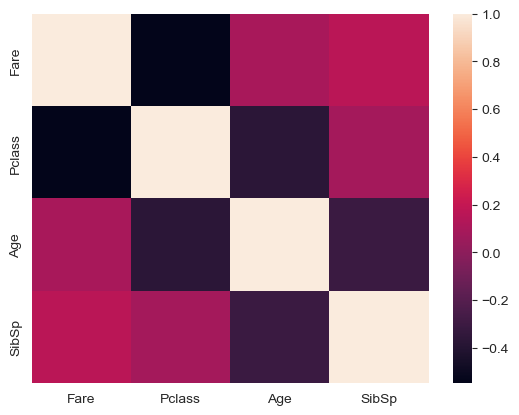

In [14]:
sns.heatmap(selected_columns.corr())

- As Pclass increases, Fare decreases ( P1 : first class, P2: Second class, P3: Third class) 


### Data Cleaning

We have null values in Age column. Let's try to deal with the missing values.

<Axes: xlabel='Pclass', ylabel='Age'>

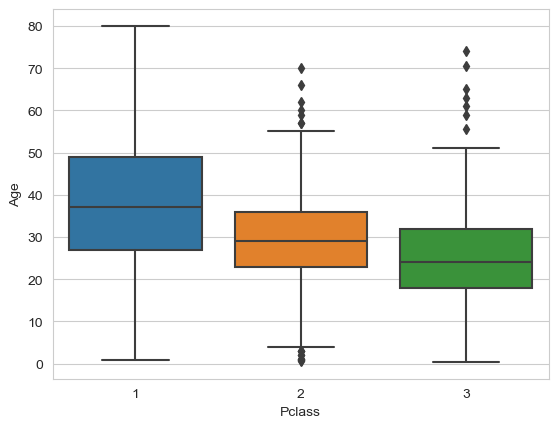

In [15]:
sns.boxplot(x='Pclass',y='Age',data=train)

- Passenger class 1( presumably rich people) were mostly of age 25 to 48. 
    - Average age= 37
- Passenger class 2( presumably middle class people) were mostly in their late twenties & early thirties.
    - Average age = 29
- Passenger class 3( presumably lower income people) were mostly teenagers to early thirties.
    - Average age = 24

In [16]:
# imputing missing values with mean values based on passenger class.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

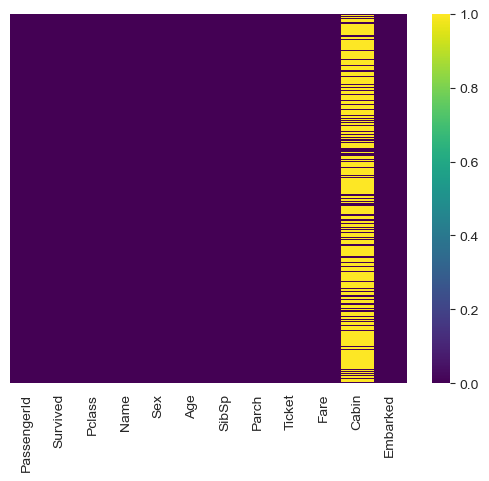

In [18]:
# Lets check the heatmap if null values still remaining
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [19]:
# Dropping the column 'Cabin' for now as it has too many null values.
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

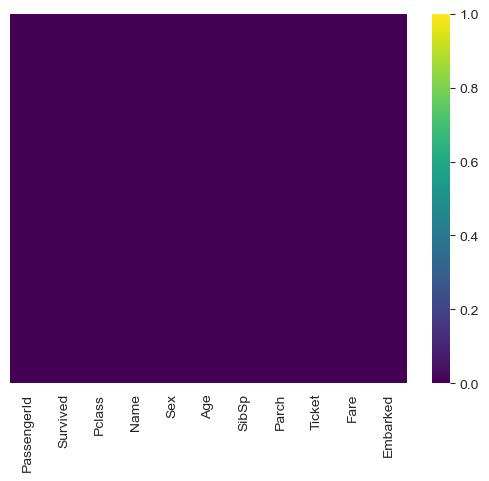

In [20]:
# Lets check the heatmap if null values still remaining
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

### Convert Categorical features

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Columns we wont be requiring further:
- PassengerId
- Name
- Ticket
- Sex ( after we create dummies)
- Embarked ( after we create dummies)

In [22]:
# Creating dummies for columns 'sex' & 'embarked'
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
# Dropping the columns we dont require:
train.drop(['Name', 'Ticket', 'Sex', 'Embarked'],axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [24]:
# Append the dummies columns ( categorical features)
train = pd.concat([train,sex,embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Applying Logistic regression

In [25]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [26]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'], test_size = 0.30,
                                                   random_state = 900)

### Training & Prediction

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)

In [35]:
accuracy = confusion_matrix(Y_test,predictions)
accuracy

array([[148,  12],
       [ 36,  72]], dtype=int64)

            Pred True    Pred False
Actual True - TP         FP

Actual False- TN         FN


- Here True means '0' & False means '1'

In [38]:
accuracy = accuracy_score(Y_test,predictions)
accuracy

0.8208955223880597

In [41]:
Y_test.value_counts()

Survived
0    160
1    108
Name: count, dtype: int64